<a href="https://colab.research.google.com/github/pragya53/Covid19-Detector-using-CNN-and-Grad-CAM/blob/master/COVID_19_Detector_CNN_and_Grad_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/CovidDataset.zip'

Archive:  /content/drive/My Drive/CovidDataset.zip
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Co

In [0]:
train_path = "CovidDataset/Train"
val_path = "CovidDataset/Test"

In [0]:
!ls

CovidDataset  drive  Model.png	sample_data  top_layer.hdf5


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image 
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

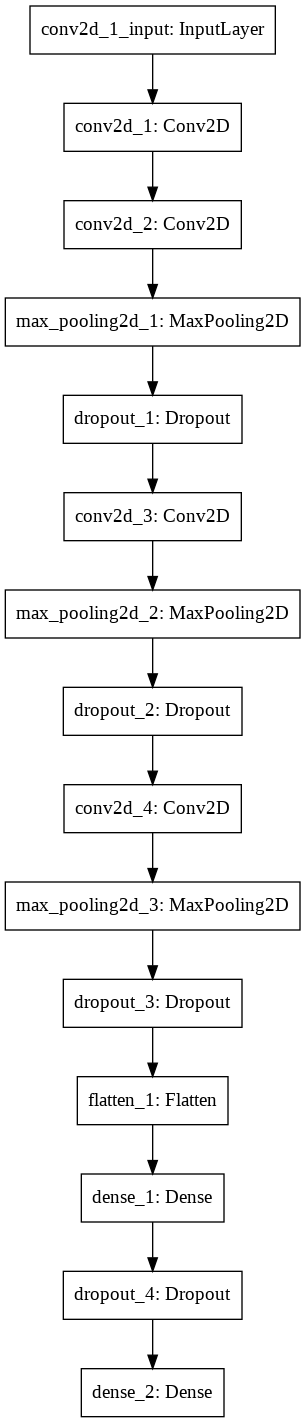

In [0]:
from keras.utils import plot_model
plot_model (model, to_file = "Model.png")

In [0]:
# Train
train_datagen = image.ImageDataGenerator(
    rescale = 1./255, #normalize to work with small weight values
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [0]:
top_layers = "top_layer.hdf5"

checkpoint = ModelCheckpoint(top_layers, monitor='loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor="loss", mode="min", patience=5)

In [0]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 6,
    validation_data = validation_generator,
    validation_steps = 2,
    #callbacks = [checkpoint,early_stopping]
)

Epoch 1/6
10/10 [==============================] - 11s 1s/step - loss: 0.0705 - accuracy: 0.9781 - val_loss: 0.0169 - val_accuracy: 0.9667
Epoch 2/6
10/10 [==============================] - 11s 1s/step - loss: 0.0636 - accuracy: 0.9844 - val_loss: 0.0690 - val_accuracy: 0.9667
Epoch 3/6
10/10 [==============================] - 11s 1s/step - loss: 0.0964 - accuracy: 0.9625 - val_loss: 0.0120 - val_accuracy: 0.9667
Epoch 4/6
10/10 [==============================] - 11s 1s/step - loss: 0.1153 - accuracy: 0.9656 - val_loss: 0.0841 - val_accuracy: 0.9667
Epoch 5/6
10/10 [==============================] - 11s 1s/step - loss: 0.0451 - accuracy: 0.9906 - val_loss: 0.1229 - val_accuracy: 0.9667
Epoch 6/6
10/10 [==============================] - 10s 1s/step - loss: 0.0666 - accuracy: 0.9719 - val_loss: 0.0104 - val_accuracy: 0.9667


In [0]:
 #class Activation maps
 #grad cam

In [0]:
model.save("/content/drive/My Drive/model_covid.h5")

In [0]:
model.evaluate_generator(train_generator)

[0.032674480229616165, 0.9821428656578064]

In [0]:
model.evaluate_generator(validation_generator)

[0.06911234557628632, 0.9666666388511658]

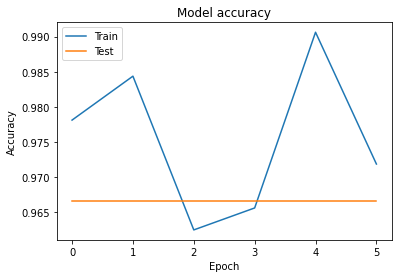

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

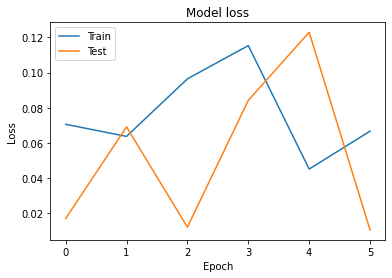

In [0]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
import os

In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_actual, y_test)
cm

array([[30,  0],
       [ 2, 28]])

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


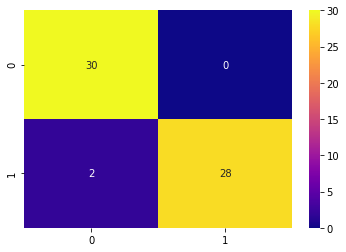

In [0]:
sns.heatmap(cm, cmap='plasma', annot=True)

In [0]:
model = load_model("/content/drive/My Drive/model_covid.h5")

In [0]:
from vis.utils import utils
from vis.visualization import visualize_cam

def show(test_img):
  img = image.load_img('./CovidDataset/Val/Normal/NORMAL2-IM-0462-0001.jpeg', target_size=(224,224))
  plt.imshow(img)

def grad_cam(test_img,p,model):
  pred = p
  class_idxs_sorted = np.argsort(pred.flatten())[::-1]
  layer_idx = utils.find_layer_idx(model, 'dense_2')
  # swap sigmoid with linear because we are not using it for classification, 
  #we're using it for creating a heatmap that we can overlay the image that acts as an explainable image
  model.layers[layer_idx].activation = keras.activations.linear
  model = utils.apply_modifications(model)
  penultimate_layer_idx = utils.find_layer_idx(model,'conv2d_4')
  class_idx = class_idxs_sorted[0]
  seed_input = img
  grad_top1 = visualize_cam(model, layer_idx, class_idx, seed_input,
                          penultimate_layer_idx = penultimate_layer_idx)
  
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(img)
    axes[1].imshow(img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)

Covid


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


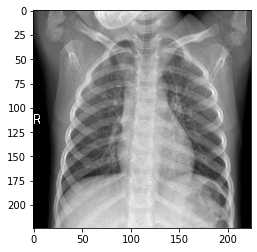

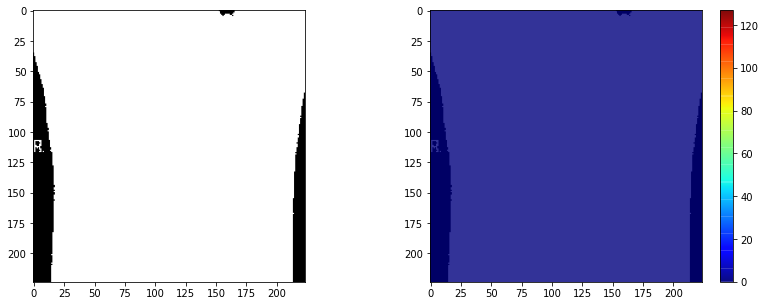

In [0]:
test_img = image.load_img('./CovidDataset/Val/Covid/41591_2020_819_Fig1_HTML.webp-day10.png', target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)

p = model.predict_classes(test_img)

if(p[0,0] == 0):
  print('Covid')
  show(test_img)
  grad_cam(test_img,p,model)
  plot_map(grad_top1)
else:
  print('Normal')
